# Linear Regression 

## Exercises

### Exercise 1

Using the diabetes data, construct a regression model that regresses the outcome variable Y on BMI and S5 using training and test data. Interpret the regression coefficients. Compare the testing scores of this model to those from the last example in the notebook. Which model performs better?


In [13]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score as r2

diabetes_data = pd.read_csv('05-LinearRegression_Diabetes_Data.csv')
# corrs= diabetes_data.corr()
diabetes_data


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [19]:
X = diabetes_data[['BMI', 'S5']]
Y = diabetes_data['Y']

X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.2, random_state=69)

linear_make = lr(fit_intercept = True)
linear_make.fit(X_train ,Y_train)
training_score = linear_make.score(X_train,Y_train)

linear_predict = linear_make.predict(X_test)

rsquared_linear = r2(Y_test,linear_predict) 


print("Coefficients are",np.round(linear_make.coef_, 3))

print("Training score is",np.round(training_score, 3))
print("Testing score is",np.round(rsquared_linear, 3))

Coefficients are [ 7.732 52.542]
Training score is 0.459
Testing score is 0.437


In [20]:
#The coefficients are 7.732 for BMI and 52.542 for S5. This means the measure of diabetes progressions increases by
#an average of 7.732 and 52.542, for a one unit increase in BMI and S5, respectively.

#This model performs better than the model from last notebook, which used BMI and BP (Blood Pressure) 
#as predictor variables with a Training score of 0.41 and Testing score of 0.297, as both the training and testing
#scores in this model are closer to 1

### Exercise 2

Given the following training and test sets for the "mpg" data, create a regression plot that shows the relationship between the mpg and weight variables. Next, fit a linear regression model to the training data. Print and interpret the regression coefficient. 

Next, use the model to predict the mpg values in the test data. How does the model perform according to the testing score?


<AxesSubplot:xlabel='weight', ylabel='mpg'>

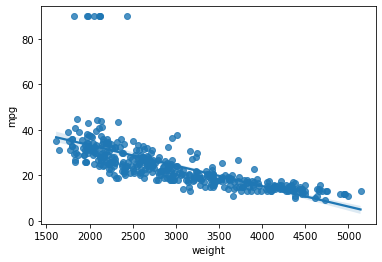

In [48]:
cars_x_train = pd.read_csv("cars_x_train.csv", index_col= 0)
cars_y_train = pd.read_csv("cars_y_train.csv", index_col= 0)
cars_x_test = pd.read_csv("cars_x_test.csv", index_col= 0)
cars_y_test = pd.read_csv("cars_y_test.csv", index_col= 0)

training_merged = pd.concat([cars_x_train, cars_y_train], axis = 1)

testing_merged = pd.concat([cars_x_test, cars_y_test], axis = 1)

all_cars = pd.merge(training_merged, testing_merged, how='outer')

sns.regplot(data = all_cars, x= 'weight', y = 'mpg')

In [57]:
linear = lr(fit_intercept = True)
linear.fit(cars_x_train ,cars_y_train)
training_score = linear.score(cars_x_train,cars_y_train)

print("Coefficients are",np.round(linear_make.coef_, 3))
#For a one unit increase in weight, the MPG is expected to decrease by 0.015 on average

Coefficients are [[-0.015]]
For a one unit increase in weight, the MPG is expected to decrease by 0.015 on average


In [59]:
prediction_mpg = linear.predict(cars_x_test)

rsquared_linear = r2(cars_y_test,prediction_mpg) 

print("Testing score is",np.round(rsquared_linear, 3))

#The negative test score indicates that the model is not a good fit for the test variables and the regression line is
#not following the trend of the data

Testing score is -0.954


### Exercise 3

Use `sns.boxplot` to determine whether there are outliers in the mpg data. Next, remove the outliers from the data (hint: use `df.drop` and the `index` argument). Re-train the model and plot the regression line. Finally, use the new model to predict the mpg scores on the test data. How does the model compare to the model in exercise 2 in terms of the testing score?

      mpg
375  90.0
379  90.0
383  90.0
378  90.0
322  90.0
320  90.0
218  90.0
348  90.0


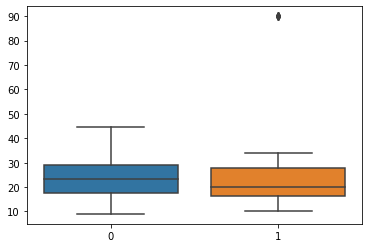

In [93]:
sns.boxplot(data= [cars_y_test,cars_y_train])


print(cars_y_train[cars_y_train['mpg'] > 50])

new_cars_y_train = cars_y_train.drop(index=[375,379,383,378,322,320,218,348])
new_cars_x_train = cars_x_train.drop(index=[375,379,383,378,322,320,218,348])

<AxesSubplot:xlabel='weight', ylabel='mpg'>

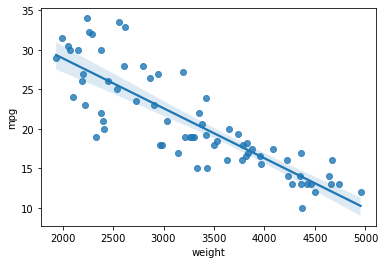

In [102]:
linear = lr(fit_intercept = True)
linear.fit(new_cars_x_train ,new_cars_y_train)
training_score = linear.score(new_cars_x_train,new_cars_y_train)
regplot_data = pd.concat([new_cars_x_train, new_cars_y_train], axis = 1)
sns.regplot(data =regplot_data, x = 'weight', y = 'mpg')

In [103]:
prediction_mpg = linear.predict(cars_x_test)

rsquared_linear = r2(cars_y_test,prediction_mpg) 

print("Testing score is",np.round(rsquared_linear, 3))

#The testing score is a lot higher than exerciseand fairly close to 1, indicating that the model fits pretty well to the testing
#data.

Testing score is 0.656
